In [1]:
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import HTML 
%matplotlib inline

Кинетическая энергия равна работе силы, которую необходимо приложить к телу для сообщения данной скорости.

пусть количество израсходованного  за 1 сек топлива (кг/с):

$ \Delta m = \dfrac{ dM_{топлива}}{dt}, кг/сек $


какую работу нужно совершить чтобы разогнать массу $\Delta m $ до скорости истечения $v$ ? 

$ \Delta A =  \dfrac{  v^2  \cdot \Delta m}{2} $


работа, совершенная за еденицу времени - т.е. это ведь наша мощность $N$.

$ N =  \dfrac{  v^2  \cdot \Delta m}{2} $

Мощность известна - это величина постоянная и равна $1.0 МВт$ с учетом к.п.д. $\eta = 0.5 $ это $N = 0.5 МВт$

Пусть нам неизвестны ни скорость истечения, ни масса, но мы знаем мощность которую мы можем тратить на разгон рабочего тела, и это $0.5МВт$

$ v = \sqrt { 2 \dfrac{ N}{\Delta m} } \space  , или \space расход \space массы:  \space \Delta m = \dfrac {2N}{v^2} = \dfrac{2 \cdot 500,000 \space Вт} {(v (м/c))^2 }$

Проверка размерностей для расхода рабочего тела:

$ \dfrac { \dfrac {кг \cdot м^2 }{c^3} }{ \dfrac{м^2}{c^2} } = \dfrac{кг}{с}$

Построим график зависимости $\Delta m(v)$ при постоянной заданной мощности, a заодно и время потраченное на расход $10,000.00$ $кг$ рабочего тела

In [2]:
# сгенерируем данные для графика
data = pd.DataFrame([(2 * 500_000/(v**2), v) for v in range(1000, 201_000, 1000)], \
                    columns=['delta_m(kg)', 'v(m/s)'])

data['time_(s)'] = 10_000 / data['delta_m(kg)'] # время в секундах, чтобы израсходовать все топливо

data['time_(year)'] = data['time_(s)']/60/60/24/365 # 60секунд * 60минут * 24 часа * 365 дней - время в годах

data[(data['v(m/s)'] >=60000) & (data['v(m/s)'] <=80000)]

,delta_m(kg),v(m/s),time_(s),time_(year)
59,0.000278,60000,36000000.0,1.141553
60,0.000269,61000,37210000.0,1.179921
61,0.000260,62000,38440000.0,1.218924
62,0.000252,63000,39690000.0,1.258562
63,0.000244,64000,40960000.0,1.298833
64,0.000237,65000,42250000.0,1.339739
65,0.000230,66000,43560000.0,1.381279
66,0.000223,67000,44890000.0,1.423453
67,0.000216,68000,46240000.0,1.466261
68,0.000210,69000,47610000.0,1.509703


In [3]:
time_end = round(data[data['v(m/s)'] == 70000]['time_(year)'].values[0],3)

display(HTML(f'<h3>Время выработки всего топлива при скорости' + \
             f' истечения 70 км/с составит: {time_end} года.</h3>'))

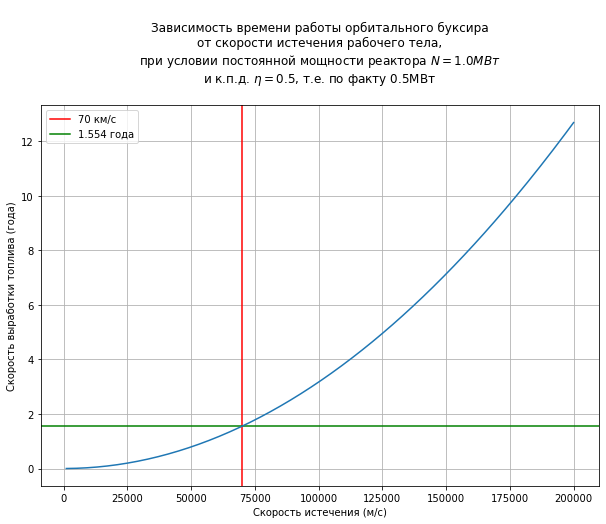

In [4]:
plt.figure(figsize=(10,7))
plt.xlabel('Скорость истечения (м/с)')
plt.ylabel('Скорость выработки топлива (года)')
plt.grid(True)
plt.title("""
Зависимость времени работы орбитального буксира
от скорости истечения рабочего тела,
при условии постоянной мощности реактора $N = 1.0 МВт$
и к.п.д. $\eta = 0.5$, т.е. по факту 0.5МВт
""")
plt.axvline(70000, color='red', label='70 км/с')
plt.axhline(time_end, color='green', label = f'{time_end} года')
plt.plot(data['v(m/s)'], data['time_(year)'])
plt.legend();

#### применим формулу Циолковского для расчета максимального приращения скорости в случае 
- Сорость истечения - 70 км/с, буксир полная масса 35, топливо 10т (за 1.5 лет разгона)
- Сорость истечения - 70 км/с, буксир полная масса 55, топливо 10т (за 1.5 лет разгона)
- Сорость истечения - 200 км/с, буксир полная масса 35, топливо 10т (за 12.5 лет разгона)
- Сорость истечения - 200 км/с, буксир полная масса 55, топливо 10т (за 12.5 лет разгона)


$ V_{конечная} = V_{истечения} \cdot \ln \left( \dfrac{M_{полная}}{ M_{полная} - M_{топлива}} \right) $

In [5]:
def calc_v_end(v, m_start, m_fuel ): 
    """
        v - скорость истечения
        m_start - начальная масса
        m_fuel - масса топлива
    """
    print(f'Скорость истечения: {v} км/с')
    print(f'Сухая масса (включая полезную нагрузку): {m_start-m_fuel} т')
    print(f'Начальная масса: {m_start} т')
    print(f'Масса топлива: {m_fuel} т')
    v_end = v*np.log(m_start/(m_start-m_fuel))
    display(HTML(f'Полное приращение скорости после расхода всего топлива: <b>{np.round(v_end,5)} км/с</b>'))
    
    return v_end

Для справки:
- Первая космическая скорость Земли - 7.9 км/с.
- Вторая космическая скорость Земли - 11.2 км/с.
- 11.2 - 7.9 = 3.3

In [6]:
'Чтобы слетать к Луне нужно изменить скорость на: ', 11.2 - 7.9

('Чтобы слетать к Луне нужно изменить скорость на: ', 3.299999999999999)

In [7]:
calc_v_end(70, 35, 10); # за 1.5 года

Скорость истечения: 70 км/с
Сухая масса (включая полезную нагрузку): 25 т
Начальная масса: 35 т
Масса топлива: 10 т


In [8]:
calc_v_end(70, 55, 10); # за 1.5 года, реально сгонять до Луны, затормозить, разгрузиться, и обратно порожняком.
                        # или наоборот, порожняком к Луне, загрузиться и назад.
                        # 35т - вес аппарата, 10т вес груз, 10т - топливо

Скорость истечения: 70 км/с
Сухая масса (включая полезную нагрузку): 45 т
Начальная масса: 55 т
Масса топлива: 10 т


In [9]:
calc_v_end(200, 35, 10); # за 12.5 лет

Скорость истечения: 200 км/с
Сухая масса (включая полезную нагрузку): 25 т
Начальная масса: 35 т
Масса топлива: 10 т


In [10]:
calc_v_end(200, 55, 10); # за 12.5 лет

Скорость истечения: 200 км/с
Сухая масса (включая полезную нагрузку): 45 т
Начальная масса: 55 т
Масса топлива: 10 т


**Замена полезной нагрузки на топливо**

In [11]:
calc_v_end(200, 55, 20); # за 25 лет

Скорость истечения: 200 км/с
Сухая масса (включая полезную нагрузку): 35 т
Начальная масса: 55 т
Масса топлива: 20 т
